# Jingtao Yang

My research question is "Which champion is the most commonly used in rank Master? And which champion is the least used?"

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv("../data/raw/TFT_Master_MatchData.csv")

In [2]:
data.head()

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion
0,KR_4242528808,2233.449951,8,37,1,2225.243408,"{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...","{'JarvanIV': {'items': [12], 'star': 3}, 'Sona..."
1,KR_4242528808,2233.449951,9,37,2,2225.243408,"{'Blaster': 2, 'Chrono': 1, 'Cybernetic': 1, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
2,KR_4242528808,2233.449951,8,35,3,2138.763428,"{'Blaster': 3, 'Chrono': 2, 'Cybernetic': 1, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
3,KR_4242528808,2233.449951,8,33,4,2003.865967,"{'Chrono': 2, 'Cybernetic': 2, 'DarkStar': 2, ...","{'Leona': {'items': [], 'star': 2}, 'Mordekais..."
4,KR_4242528808,2233.449951,7,31,5,1885.395386,"{'Blaster': 1, 'DarkStar': 1, 'Demolitionist':...","{'KhaZix': {'items': [], 'star': 2}, 'KaiSa': ..."


In [3]:
#Import Libraries
import numpy as np
data.shape

(79999, 8)

In [4]:
data.head()

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion
0,KR_4242528808,2233.449951,8,37,1,2225.243408,"{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...","{'JarvanIV': {'items': [12], 'star': 3}, 'Sona..."
1,KR_4242528808,2233.449951,9,37,2,2225.243408,"{'Blaster': 2, 'Chrono': 1, 'Cybernetic': 1, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
2,KR_4242528808,2233.449951,8,35,3,2138.763428,"{'Blaster': 3, 'Chrono': 2, 'Cybernetic': 1, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
3,KR_4242528808,2233.449951,8,33,4,2003.865967,"{'Chrono': 2, 'Cybernetic': 2, 'DarkStar': 2, ...","{'Leona': {'items': [], 'star': 2}, 'Mordekais..."
4,KR_4242528808,2233.449951,7,31,5,1885.395386,"{'Blaster': 1, 'DarkStar': 1, 'Demolitionist':...","{'KhaZix': {'items': [], 'star': 2}, 'KaiSa': ..."


In [5]:
data.columns

Index(['gameId', 'gameDuration', 'level', 'lastRound', 'Ranked',
       'ingameDuration', 'combination', 'champion'],
      dtype='object')

In [6]:
data.nunique(axis=0)

gameId            10000
gameDuration       9966
level                 7
lastRound            38
Ranked                9
ingameDuration    69296
combination       26452
champion          79932
dtype: int64

In [7]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,gameDuration,level,lastRound,Ranked,ingameDuration
count,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000
mean,2155.497472,7.841323,33.531157,4.499331,1876.467332
std,133.843352,0.771159,4.784822,2.291910,267.107052
min,181.108841,3.000000,5.000000,0.000000,178.951233
25%,2063.781738,7.000000,30.000000,2.000000,1705.329529
50%,2148.008301,8.000000,34.000000,4.000000,1900.402954
75%,2242.993652,8.000000,37.000000,6.000000,2063.158691
max,2738.779053,9.000000,48.000000,8.000000,2730.512695


In [8]:
data.gameId.unique()

array(['KR_4242528808', 'KR_4242832362', 'KR_4245902754', ...,
       'KR_4367590765', 'KR_4367601148', 'KR_4367610629'], dtype=object)

In [9]:
data.gameDuration.unique()

array([2233.44995117, 2229.640625  , 2207.38305664, ..., 2090.05200195,
       2259.52197266, 2171.34399414])

In [10]:
data.level.unique()

array([8, 9, 7, 6, 5, 4, 3], dtype=int64)

In [11]:
data.lastRound.unique()

array([37, 35, 33, 31, 27, 26, 38, 30, 24, 28, 34, 40, 23, 16, 21, 19, 20,
       12, 11, 41, 14, 42, 45, 25, 13, 47, 18, 44, 36, 15, 32, 29, 39, 17,
       10, 22,  5, 48], dtype=int64)

In [12]:
data.Ranked.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 0], dtype=int64)

In [13]:
data.ingameDuration.unique()

array([2225.2434082 , 2138.76342773, 2003.8659668 , ..., 1658.85058594,
       1562.578125  , 1264.66699219])

In [14]:
data.combination.unique()

array(["{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'Set3_Celestial': 3, 'Set3_Mystic': 4, 'StarGuardian': 2}",
       "{'Blaster': 2, 'Chrono': 1, 'Cybernetic': 1, 'Mercenary': 1, 'Rebel': 2, 'Set3_Blademaster': 1, 'Set3_Brawler': 4, 'Set3_Celestial': 1, 'Set3_Mystic': 2, 'Set3_Void': 1, 'StarGuardian': 1, 'Valkyrie': 2}",
       "{'Blaster': 3, 'Chrono': 2, 'Cybernetic': 1, 'Mercenary': 1, 'Rebel': 3, 'Set3_Brawler': 4, 'Set3_Void': 1, 'StarGuardian': 1, 'Starship': 1, 'Valkyrie': 1}",
       ...,
       "{'Chrono': 3, 'Cybernetic': 1, 'DarkStar': 1, 'ManaReaver': 2, 'Protector': 2, 'Rebel': 1, 'Set3_Blademaster': 3, 'Set3_Brawler': 1, 'Set3_Celestial': 4, 'Sniper': 2, 'TemplateTrait': 1}",
       "{'Protector': 4, 'Rebel': 3, 'Set3_Blademaster': 2, 'Set3_Celestial': 2, 'Set3_Mystic': 2, 'StarGuardian': 2}",
       "{'Cybernetic': 1, 'DarkStar': 1, 'Demolitionist': 1, 'Infiltrator': 4, 'MechPilot': 1, 'Set3_Blademaster': 1, 'Set3_Void': 1, 'Valkyrie': 2}"],
      dtype=object)

In [15]:
data.champion.unique()

array(["{'JarvanIV': {'items': [12], 'star': 3}, 'Sona': {'items': [46], 'star': 3}, 'Rakan': {'items': [37, 45], 'star': 3}, 'XinZhao': {'items': [25, 66, 13], 'star': 3}, 'Neeko': {'items': [], 'star': 2}, 'Karma': {'items': [], 'star': 2}, 'Soraka': {'items': [], 'star': 1}, 'Lulu': {'items': [99, 47, 55], 'star': 2}}",
       "{'Malphite': {'items': [], 'star': 2}, 'Blitzcrank': {'items': [], 'star': 2}, 'Vi': {'items': [], 'star': 1}, 'Jinx': {'items': [56, 13, 29], 'star': 2}, 'Soraka': {'items': [], 'star': 2}, 'ChoGath': {'items': [36, 6, 27], 'star': 2}, 'Kayle': {'items': [], 'star': 2}, 'MissFortune': {'items': [37, 34], 'star': 1}, 'Lulu': {'items': [17], 'star': 2}}",
       "{'Malphite': {'items': [], 'star': 2}, 'Blitzcrank': {'items': [], 'star': 2}, 'Ezreal': {'items': [], 'star': 2}, 'Vi': {'items': [36], 'star': 2}, 'Jinx': {'items': [13, 57, 69], 'star': 1}, 'ChoGath': {'items': [], 'star': 2}, 'MissFortune': {'items': [33, 69], 'star': 2}, 'AurelionSol': {'items': 

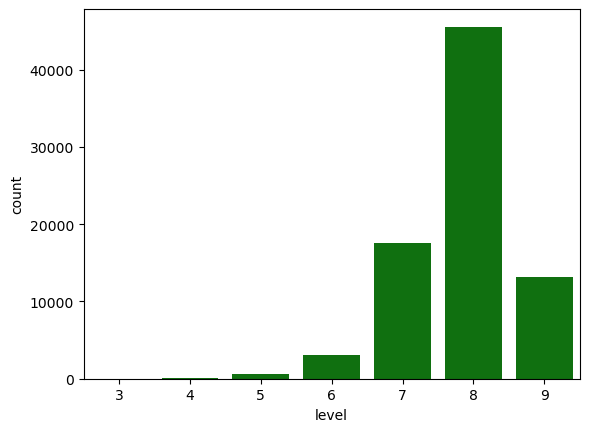

In [16]:
plot3=sns.countplot(data=data,x='level', color='green')

In [17]:
print('The numbers of the levels has been shown. 8 is where the most player ended up with')

The numbers of the levels has been shown. 8 is where the most player ended up with


<AxesSubplot:xlabel='ingameDuration', ylabel='Ranked'>

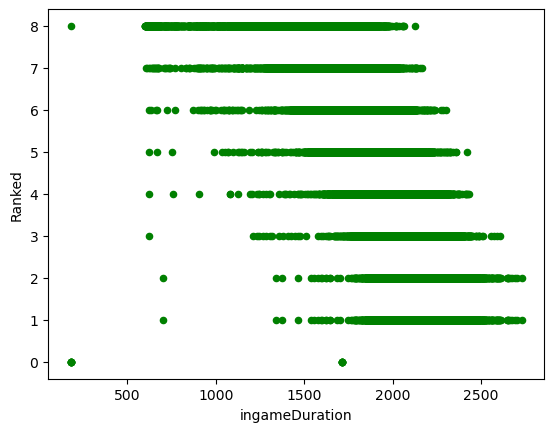

In [18]:
data.plot(kind='scatter', x='ingameDuration', y='Ranked', color = 'green')

In [19]:
print('This plot shows the relationship between in game duration and the rank of the players. We can see that there is a positive relationship between the rank and ingameDuration.')

This plot shows the relationship between in game duration and the rank of the players. We can see that there is a positive relationship between the rank and ingameDuration.


<AxesSubplot:xlabel='ingameDuration', ylabel='lastRound'>

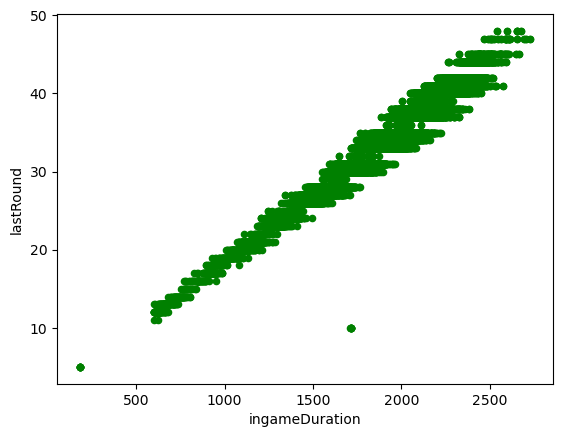

In [20]:
data.plot(kind='scatter', x='ingameDuration', y='lastRound', color='green')

In [21]:
print('The plot shows the relatonship between ingameDuration and lastRound. It is a positive relationsihp.')

The plot shows the relatonship between ingameDuration and lastRound. It is a positive relationsihp.


In [22]:
##Data Analysis begins

In [23]:
df=data.drop(["gameId","gameDuration","level","lastRound","ingameDuration",'combination'], axis="columns")
df=df.drop(df[df.Ranked!=1].index)
df=df.reset_index()
df.head()

,index,Ranked,champion
0,0,1,"{'JarvanIV': {'items': [12], 'star': 3}, 'Sona..."
1,8,1,"{'Ziggs': {'items': [], 'star': 1}, 'Malphite'..."
2,16,1,"{'Ziggs': {'items': [], 'star': 1}, 'Sona': {'..."
3,24,1,"{'Ziggs': {'items': [], 'star': 1}, 'Yasuo': {..."
4,32,1,"{'Yasuo': {'items': [], 'star': 2}, 'Sona': {'..."


In [24]:
import ast

In [25]:
df['championl']=df['champion'].astype('str')
df['championl']=df['championl'].apply(lambda x: ast.literal_eval(x))
df=df.drop(["champion"], axis="columns")
df.head()

,index,Ranked,championl
0,0,1,"{'JarvanIV': {'items': [12], 'star': 3}, 'Sona..."
1,8,1,"{'Ziggs': {'items': [], 'star': 1}, 'Malphite'..."
2,16,1,"{'Ziggs': {'items': [], 'star': 1}, 'Sona': {'..."
3,24,1,"{'Ziggs': {'items': [], 'star': 1}, 'Yasuo': {..."
4,32,1,"{'Yasuo': {'items': [], 'star': 2}, 'Sona': {'..."


In [26]:
clist=[]
clist=df['championl'].apply(lambda x: list(set(x)))
chs=[]
for i in clist:
    chs=list(set(chs+i))
sorted(chs)

['Ahri',
 'Annie',
 'Ashe',
 'AurelionSol',
 'Blitzcrank',
 'Caitlyn',
 'ChoGath',
 'Darius',
 'Ekko',
 'Ezreal',
 'Fiora',
 'Fizz',
 'Gangplank',
 'Graves',
 'Irelia',
 'JarvanIV',
 'Jayce',
 'Jhin',
 'Jinx',
 'KaiSa',
 'Karma',
 'Kassadin',
 'Kayle',
 'KhaZix',
 'Leona',
 'Lucian',
 'Lulu',
 'Lux',
 'Malphite',
 'MasterYi',
 'MissFortune',
 'Mordekaiser',
 'Neeko',
 'Poppy',
 'Rakan',
 'Rumble',
 'Shaco',
 'Shen',
 'Sona',
 'Soraka',
 'Syndra',
 'Thresh',
 'TwistedFate',
 'VelKoz',
 'Vi',
 'WuKong',
 'Xayah',
 'Xerath',
 'XinZhao',
 'Yasuo',
 'Ziggs',
 'Zoe']

In [27]:
df2=df
df2[[chs]]=None
cols=['Ranked','championl']+sorted(chs)
df2=df2[cols]
df2.head()

,Ranked,championl,Ahri,Annie,Ashe,AurelionSol,Blitzcrank,Caitlyn,ChoGath,Darius,...,TwistedFate,VelKoz,Vi,WuKong,Xayah,Xerath,XinZhao,Yasuo,Ziggs,Zoe
0,1,"{'JarvanIV': {'items': [12], 'star': 3}, 'Sona...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,1,"{'Ziggs': {'items': [], 'star': 1}, 'Malphite'...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,1,"{'Ziggs': {'items': [], 'star': 1}, 'Sona': {'...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,1,"{'Ziggs': {'items': [], 'star': 1}, 'Yasuo': {...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,1,"{'Yasuo': {'items': [], 'star': 2}, 'Sona': {'...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [28]:
for i in range(len(df2.championl)):
    keylist=list(df2.championl[i].keys())
    for k in keylist:
        value=df2.championl[i].get(k)
        df2.at[i,k]=value
    
df2.head()

,Ranked,championl,Ahri,Annie,Ashe,AurelionSol,Blitzcrank,Caitlyn,ChoGath,Darius,...,TwistedFate,VelKoz,Vi,WuKong,Xayah,Xerath,XinZhao,Yasuo,Ziggs,Zoe
0,1,"{'JarvanIV': {'items': [12], 'star': 3}, 'Sona...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,"{'items': [25, 66, 13], 'star': 3}",None,None,None
1,1,"{'Ziggs': {'items': [], 'star': 1}, 'Malphite'...",None,None,None,"{'items': [37, 34, 36], 'star': 2}",None,None,None,None,...,None,None,None,None,None,None,None,None,"{'items': [], 'star': 1}",None
2,1,"{'Ziggs': {'items': [], 'star': 1}, 'Sona': {'...",None,None,None,"{'items': [77, 35, 37], 'star': 2}",None,None,None,None,...,None,None,None,None,None,None,None,None,"{'items': [], 'star': 1}",None
3,1,"{'Ziggs': {'items': [], 'star': 1}, 'Yasuo': {...",None,None,None,"{'items': [44, 46, 77], 'star': 1}",None,None,None,None,...,None,None,None,None,None,None,None,"{'items': [], 'star': 2}","{'items': [], 'star': 1}",None
4,1,"{'Yasuo': {'items': [], 'star': 2}, 'Sona': {'...",None,None,None,"{'items': [37, 44], 'star': 2}",None,None,None,None,...,None,None,None,None,None,None,None,"{'items': [], 'star': 2}",None,None


In [29]:
d_ahri = df2.get('Ahri')
d_annie = df2.get('Annie')
d_ashe = df2.get('Ashe')
d_aurelionsol = df2.get('AurelionSol')
d_blitzcrank = df2.get('Blitzcrank')
d_caitlyn = df2.get('Caitlyn')
d_chogath = df2.get('ChoGath')
d_darius = df2.get('Darius')
d_ekko = df2.get('Ekko')
d_ezreal = df2.get('Ezreal')
d_fiora = df2.get('Fiora')
d_fizz = df2.get('Fizz')
d_gangplank = df2.get('Gangplank')
d_graves = df2.get('Graves')
d_irelia = df2.get('Irelia')
d_jarvaniv = df2.get('JarvanIV')
d_jayce = df2.get('Jayce')
d_jhin = df2.get('Jhin')
d_jinx = df2.get('Jinx')
d_kaisa = df2.get('KaiSa')
d_karma = df2.get('Karma')
d_kassadin = df2.get('Kassadin')
d_kayle = df2.get('Kayle')
d_khazix = df2.get('KhaZix')
d_leona = df2.get('Leona')
d_lucian = df2.get('Lucian')
d_lulu = df2.get('Lulu')
d_lux = df2.get('Lux')
d_malphite = df2.get('Malphite')
d_masteryi = df2.get('MasterYi')
d_missfortune = df2.get('MissFortune')
d_mordekaiser = df2.get('Mordekaiser')
d_neeko = df2.get('Neeko')
d_poppy = df2.get('Poppy')
d_rakan = df2.get('Rakan')
d_rumble = df2.get('Rumble')
d_shaco = df2.get('Shaco')
d_shen = df2.get('Shen')
d_sona = df2.get('Sona')
d_soraka = df2.get('Soraka')
d_syndra = df2.get('Syndra')
d_thresh = df2.get('Thresh')
d_twistedfate = df2.get('TwistedFate')
d_velkoz = df2.get('VelKoz')
d_vi = df2.get('Vi')
d_wukong = df2.get('WuKong')
d_xayah = df2.get('Xayah')
d_xerath = df2.get('Xerath')
d_xinzhao = df2.get('XinZhao')
d_yasuo = df2.get('Yasuo')
d_ziggs = df2.get('Ziggs')
d_zoe = df2.get('Zoe')

In [30]:
def get_number(lib):
    num = 0
    for n in range(0, 1000):
         if lib.get(n) is not None:
            num+=1
    return num

In [31]:
dataFinal = {'champions': ['Ahri','Annie', 'Ashe', 'AurelionSol', 'Blitzcrank', 'Caitlyn', 'ChoGath', 'Darius', 'Ekko', 'Ezreal', 'Fiora',
                          'Fizz', 'Gangplank', 'Graves', 'Irelia', 'JarvanIV', 'Jayce', 'Jhin', 'Jinx', 'KaiSa', 'Karma', 'Kassadin', 'Kayle', 
                          'KhaZix', 'Leona', 'Lucian', 'Lulu', 'Lux', 'Malphite', 'MasterYi', 'MissFortune', 'Mordekaiser', 'Neeko', 'Poppy', 
                          'Rakan', 'Rumble', 'Shaco', 'Shen', 'Sona', 'Soraka', 'Syndra', 'Thresh', 'TwistedFate', 'VelKoz', 'Vi', 'WuKong', 
                          'Xayah', 'Xerath', 'XinZhao', 'Yasuo', 'Ziggs', 'Zoe'], 
             'used_frequence':[get_number(d_ahri),get_number(d_annie), get_number(d_ashe), get_number(d_aurelionsol), get_number(d_blitzcrank), 
                              get_number(d_caitlyn), get_number(d_chogath), get_number(d_darius),get_number(d_ekko), get_number(d_ezreal), 
                              get_number(d_fiora), get_number(d_fizz), get_number(d_gangplank), get_number(d_graves), get_number(d_irelia), 
                              get_number(d_jarvaniv), get_number(d_jayce), get_number(d_jhin), get_number(d_jinx), get_number(d_kaisa), 
                              get_number(d_karma), get_number(d_kassadin), get_number(d_kayle), get_number(d_khazix), get_number(d_leona), 
                              get_number(d_lucian), get_number(d_lulu), get_number(d_lux), get_number(d_malphite), get_number(d_masteryi), 
                              get_number(d_missfortune), get_number(d_mordekaiser), get_number(d_neeko), get_number(d_poppy), get_number(d_rakan),
                              get_number(d_rumble), get_number(d_shaco), get_number(d_shen), get_number(d_sona), get_number(d_soraka), 
                              get_number(d_syndra), get_number(d_thresh), get_number(d_twistedfate), get_number(d_velkoz), get_number(d_vi), 
                              get_number(d_wukong), get_number(d_xayah), get_number(d_xerath), get_number(d_xinzhao), get_number(d_yasuo), 
                              get_number(d_ziggs), get_number(d_zoe)]}

In [32]:
dataFrameFinal = pd.DataFrame.from_dict(dataFinal)
dataFrameFinal = dataFrameFinal.sort_values('used_frequence', ascending = False)
dataFrameFinal

,champions,used_frequence
8,Ekko,363
44,Vi,355
20,Karma,323
26,Lulu,307
27,Lux,307
41,Thresh,281
14,Irelia,279
1,Annie,277
11,Fizz,274
35,Rumble,273


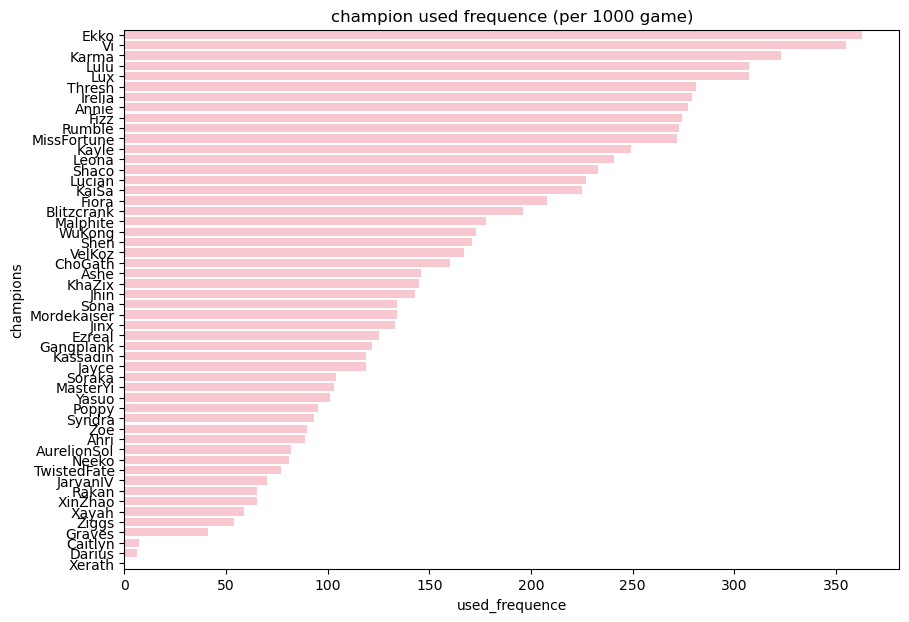

In [33]:
plt.figure(figsize = (10,7))
plotFinal = sns.barplot(data=dataFrameFinal, x = 'used_frequence', y = 'champions', color='pink').set(title = 'champion used frequence (per 1000 game)')
plt.show()

In [34]:
##Method Chaining begins 

In [35]:
import pandas as pd
import numpy as np
import ast
import operator
from functools import reduce

In [36]:
df=(
    pd.read_csv("../data/raw/TFT_Master_MatchData.csv")
    .drop(["gameId","gameDuration","level","lastRound","ingameDuration",'combination'], axis="columns")
    .loc[lambda x: x['Ranked']==1]
    .reset_index()
    .drop(["index"], axis="columns")
    .assign(champion_dict=lambda df:
            df['champion'].apply(lambda x: ast.literal_eval(x)))
    .drop(["champion"], axis="columns")
)

df.head()

,Ranked,champion_dict
0,1,"{'JarvanIV': {'items': [12], 'star': 3}, 'Sona..."
1,1,"{'Ziggs': {'items': [], 'star': 1}, 'Malphite'..."
2,1,"{'Ziggs': {'items': [], 'star': 1}, 'Sona': {'..."
3,1,"{'Ziggs': {'items': [], 'star': 1}, 'Yasuo': {..."
4,1,"{'Yasuo': {'items': [], 'star': 2}, 'Sona': {'..."


In [37]:
clist=list(np.unique(reduce(operator.add, df.champion_dict.apply(lambda x: list(x.keys())))))
print(clist)

['Ahri', 'Annie', 'Ashe', 'AurelionSol', 'Blitzcrank', 'Caitlyn', 'ChoGath', 'Darius', 'Ekko', 'Ezreal', 'Fiora', 'Fizz', 'Gangplank', 'Graves', 'Irelia', 'JarvanIV', 'Jayce', 'Jhin', 'Jinx', 'KaiSa', 'Karma', 'Kassadin', 'Kayle', 'KhaZix', 'Leona', 'Lucian', 'Lulu', 'Lux', 'Malphite', 'MasterYi', 'MissFortune', 'Mordekaiser', 'Neeko', 'Poppy', 'Rakan', 'Rumble', 'Shaco', 'Shen', 'Sona', 'Soraka', 'Syndra', 'Thresh', 'TwistedFate', 'VelKoz', 'Vi', 'WuKong', 'Xayah', 'Xerath', 'XinZhao', 'Yasuo', 'Ziggs', 'Zoe']


In [38]:
df = (
    df.join([ pd.DataFrame(None, index=df.index, columns=sorted(clist) )])
)
for i in range(len(df.champion_dict)):
    keylist=list(df.champion_dict[i].keys())
    for k in clist:
        value=df.champion_dict[i].get(k)
        df.at[i,k]=value
df.head()

,Ranked,champion_dict,Ahri,Annie,Ashe,AurelionSol,Blitzcrank,Caitlyn,ChoGath,Darius,...,TwistedFate,VelKoz,Vi,WuKong,Xayah,Xerath,XinZhao,Yasuo,Ziggs,Zoe
0,1,"{'JarvanIV': {'items': [12], 'star': 3}, 'Sona...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,"{'items': [25, 66, 13], 'star': 3}",None,None,None
1,1,"{'Ziggs': {'items': [], 'star': 1}, 'Malphite'...",None,None,None,"{'items': [37, 34, 36], 'star': 2}",None,None,None,None,...,None,None,None,None,None,None,None,None,"{'items': [], 'star': 1}",None
2,1,"{'Ziggs': {'items': [], 'star': 1}, 'Sona': {'...",None,None,None,"{'items': [77, 35, 37], 'star': 2}",None,None,None,None,...,None,None,None,None,None,None,None,None,"{'items': [], 'star': 1}",None
3,1,"{'Ziggs': {'items': [], 'star': 1}, 'Yasuo': {...",None,None,None,"{'items': [44, 46, 77], 'star': 1}",None,None,None,None,...,None,None,None,None,None,None,None,"{'items': [], 'star': 2}","{'items': [], 'star': 1}",None
4,1,"{'Yasuo': {'items': [], 'star': 2}, 'Sona': {'...",None,None,None,"{'items': [37, 44], 'star': 2}",None,None,None,None,...,None,None,None,None,None,None,None,"{'items': [], 'star': 2}",None,None


In [39]:
d_ahri = df.get('Ahri')
d_annie = df.get('Annie')
d_ashe = df.get('Ashe')
d_aurelionsol = df.get('AurelionSol')
d_blitzcrank = df.get('Blitzcrank')
d_caitlyn = df.get('Caitlyn')
d_chogath = df.get('ChoGath')
d_darius = df.get('Darius')
d_ekko = df.get('Ekko')
d_ezreal = df.get('Ezreal')
d_fiora = df.get('Fiora')
d_fizz = df.get('Fizz')
d_gangplank = df.get('Gangplank')
d_graves = df.get('Graves')
d_irelia = df.get('Irelia')
d_jarvaniv = df.get('JarvanIV')
d_jayce = df.get('Jayce')
d_jhin = df.get('Jhin')
d_jinx = df.get('Jinx')
d_kaisa = df.get('KaiSa')
d_karma = df.get('Karma')
d_kassadin = df.get('Kassadin')
d_kayle = df.get('Kayle')
d_khazix = df.get('KhaZix')
d_leona = df.get('Leona')
d_lucian = df.get('Lucian')
d_lulu = df.get('Lulu')
d_lux = df.get('Lux')
d_malphite = df.get('Malphite')
d_masteryi = df.get('MasterYi')
d_missfortune = df.get('MissFortune')
d_mordekaiser = df.get('Mordekaiser')
d_neeko = df.get('Neeko')
d_poppy = df.get('Poppy')
d_rakan = df.get('Rakan')
d_rumble = df.get('Rumble')
d_shaco = df.get('Shaco')
d_shen = df.get('Shen')
d_sona = df.get('Sona')
d_soraka = df.get('Soraka')
d_syndra = df.get('Syndra')
d_thresh = df.get('Thresh')
d_twistedfate = df.get('TwistedFate')
d_velkoz = df.get('VelKoz')
d_vi = df.get('Vi')
d_wukong = df.get('WuKong')
d_xayah = df.get('Xayah')
d_xerath = df.get('Xerath')
d_xinzhao = df.get('XinZhao')
d_yasuo = df.get('Yasuo')
d_ziggs = df.get('Ziggs')
d_zoe = df.get('Zoe')

In [40]:
finaldf = (pd.DataFrame.from_dict({'champions': ['Ahri','Annie', 'Ashe', 'AurelionSol', 'Blitzcrank', 'Caitlyn', 'ChoGath', 'Darius', 'Ekko', 'Ezreal', 'Fiora',
                          'Fizz', 'Gangplank', 'Graves', 'Irelia', 'JarvanIV', 'Jayce', 'Jhin', 'Jinx', 'KaiSa', 'Karma', 'Kassadin', 'Kayle', 
                          'KhaZix', 'Leona', 'Lucian', 'Lulu', 'Lux', 'Malphite', 'MasterYi', 'MissFortune', 'Mordekaiser', 'Neeko', 'Poppy', 
                          'Rakan', 'Rumble', 'Shaco', 'Shen', 'Sona', 'Soraka', 'Syndra', 'Thresh', 'TwistedFate', 'VelKoz', 'Vi', 'WuKong', 
                          'Xayah', 'Xerath', 'XinZhao', 'Yasuo', 'Ziggs', 'Zoe'], 
             'used_frequence':[get_number(d_ahri),get_number(d_annie), get_number(d_ashe), get_number(d_aurelionsol), get_number(d_blitzcrank), 
                              get_number(d_caitlyn), get_number(d_chogath), get_number(d_darius),get_number(d_ekko), get_number(d_ezreal), 
                              get_number(d_fiora), get_number(d_fizz), get_number(d_gangplank), get_number(d_graves), get_number(d_irelia), 
                              get_number(d_jarvaniv), get_number(d_jayce), get_number(d_jhin), get_number(d_jinx), get_number(d_kaisa), 
                              get_number(d_karma), get_number(d_kassadin), get_number(d_kayle), get_number(d_khazix), get_number(d_leona), 
                              get_number(d_lucian), get_number(d_lulu), get_number(d_lux), get_number(d_malphite), get_number(d_masteryi), 
                              get_number(d_missfortune), get_number(d_mordekaiser), get_number(d_neeko), get_number(d_poppy), get_number(d_rakan),
                              get_number(d_rumble), get_number(d_shaco), get_number(d_shen), get_number(d_sona), get_number(d_soraka), 
                              get_number(d_syndra), get_number(d_thresh), get_number(d_twistedfate), get_number(d_velkoz), get_number(d_vi), 
                              get_number(d_wukong), get_number(d_xayah), get_number(d_xerath), get_number(d_xinzhao), get_number(d_yasuo), 
                              get_number(d_ziggs), get_number(d_zoe)]})
     .sort_values('used_frequence', ascending = False)
     )
finaldf.head()

,champions,used_frequence
8,Ekko,363
44,Vi,355
20,Karma,323
26,Lulu,307
27,Lux,307


In [11]:
import pandas as pd
import numpy as np
import ast
import operator
from functools import reduce

def load_and_process(url_or_path_to_csv_file):
    def get_number(lib):
        num = 0
        for n in range(0, 1000):
             if lib.get(n) is not None:
                num+=1
        return num
    df1=(
    pd.read_csv(url_or_path_to_csv_file)
    .drop(["gameId","gameDuration","level","lastRound","ingameDuration",'combination'], axis="columns")
    .loc[lambda x: x['Ranked']==1]
    .reset_index()
    .drop(["index"], axis="columns")
    .assign(champion_dict=lambda df:
            df['champion'].apply(lambda x: ast.literal_eval(x)))
    .drop(["champion"], axis="columns")
    )
    clist=list(np.unique(reduce(operator.add, df1.champion_dict.apply(lambda x: list(x.keys())))))
    
    df2=df1.join([ pd.DataFrame(None, index=df1.index, columns=sorted(clist) )])
        

    for i in range(len(df2.champion_dict)):
        keylist=list(df2.champion_dict[i].keys())
        for k in clist:
            value=df2.champion_dict[i].get(k)
            df2.at[i,k]=value
    df2.head()
    d_ahri = df2.get('Ahri')
    d_annie = df2.get('Annie')
    d_ashe = df2.get('Ashe')
    d_aurelionsol = df2.get('AurelionSol')
    d_blitzcrank = df2.get('Blitzcrank')
    d_caitlyn = df2.get('Caitlyn')
    d_chogath = df2.get('ChoGath')
    d_darius = df2.get('Darius')
    d_ekko = df2.get('Ekko')
    d_ezreal = df2.get('Ezreal')
    d_fiora = df2.get('Fiora')
    d_fizz = df2.get('Fizz')
    d_gangplank = df2.get('Gangplank')
    d_graves = df2.get('Graves')
    d_irelia = df2.get('Irelia')
    d_jarvaniv = df2.get('JarvanIV')
    d_jayce = df2.get('Jayce')
    d_jhin = df2.get('Jhin')
    d_jinx = df2.get('Jinx')
    d_kaisa = df2.get('KaiSa')
    d_karma = df2.get('Karma')
    d_kassadin = df2.get('Kassadin')
    d_kayle = df2.get('Kayle')
    d_khazix = df2.get('KhaZix')
    d_leona = df2.get('Leona')
    d_lucian = df2.get('Lucian')
    d_lulu = df2.get('Lulu')
    d_lux = df2.get('Lux')
    d_malphite = df2.get('Malphite')
    d_masteryi = df2.get('MasterYi')
    d_missfortune = df2.get('MissFortune')
    d_mordekaiser = df2.get('Mordekaiser')
    d_neeko = df2.get('Neeko')
    d_poppy = df2.get('Poppy')
    d_rakan = df2.get('Rakan')
    d_rumble = df2.get('Rumble')
    d_shaco = df2.get('Shaco')
    d_shen = df2.get('Shen')
    d_sona = df2.get('Sona')
    d_soraka = df2.get('Soraka')
    d_syndra = df2.get('Syndra')
    d_thresh = df2.get('Thresh')
    d_twistedfate = df2.get('TwistedFate')
    d_velkoz = df2.get('VelKoz')
    d_vi = df2.get('Vi')
    d_wukong = df2.get('WuKong')
    d_xayah = df2.get('Xayah')
    d_xerath = df2.get('Xerath')
    d_xinzhao = df2.get('XinZhao')
    d_yasuo = df2.get('Yasuo')
    d_ziggs = df2.get('Ziggs')
    d_zoe = df2.get('Zoe')
    finaldf = (pd.DataFrame.from_dict({'champions': ['Ahri','Annie', 'Ashe', 'AurelionSol', 'Blitzcrank', 'Caitlyn', 'ChoGath', 'Darius', 'Ekko', 'Ezreal', 'Fiora',
                              'Fizz', 'Gangplank', 'Graves', 'Irelia', 'JarvanIV', 'Jayce', 'Jhin', 'Jinx', 'KaiSa', 'Karma', 'Kassadin', 'Kayle', 
                              'KhaZix', 'Leona', 'Lucian', 'Lulu', 'Lux', 'Malphite', 'MasterYi', 'MissFortune', 'Mordekaiser', 'Neeko', 'Poppy', 
                              'Rakan', 'Rumble', 'Shaco', 'Shen', 'Sona', 'Soraka', 'Syndra', 'Thresh', 'TwistedFate', 'VelKoz', 'Vi', 'WuKong', 
                              'Xayah', 'Xerath', 'XinZhao', 'Yasuo', 'Ziggs', 'Zoe'], 
                 'used_frequence':[get_number(d_ahri),get_number(d_annie), get_number(d_ashe), get_number(d_aurelionsol), get_number(d_blitzcrank), 
                                  get_number(d_caitlyn), get_number(d_chogath), get_number(d_darius),get_number(d_ekko), get_number(d_ezreal), 
                                  get_number(d_fiora), get_number(d_fizz), get_number(d_gangplank), get_number(d_graves), get_number(d_irelia), 
                                  get_number(d_jarvaniv), get_number(d_jayce), get_number(d_jhin), get_number(d_jinx), get_number(d_kaisa), 
                                  get_number(d_karma), get_number(d_kassadin), get_number(d_kayle), get_number(d_khazix), get_number(d_leona), 
                                  get_number(d_lucian), get_number(d_lulu), get_number(d_lux), get_number(d_malphite), get_number(d_masteryi), 
                                  get_number(d_missfortune), get_number(d_mordekaiser), get_number(d_neeko), get_number(d_poppy), get_number(d_rakan),
                                  get_number(d_rumble), get_number(d_shaco), get_number(d_shen), get_number(d_sona), get_number(d_soraka), 
                                  get_number(d_syndra), get_number(d_thresh), get_number(d_twistedfate), get_number(d_velkoz), get_number(d_vi), 
                                  get_number(d_wukong), get_number(d_xayah), get_number(d_xerath), get_number(d_xinzhao), get_number(d_yasuo), 
                                  get_number(d_ziggs), get_number(d_zoe)]})
         .sort_values('used_frequence', ascending = False)
        )
    
    return finaldf

In [12]:
final_df = load_and_process("../data/raw/TFT_Master_MatchData.csv")
final_df

,champions,used_frequence
8,Ekko,363
44,Vi,355
20,Karma,323
26,Lulu,307
27,Lux,307
41,Thresh,281
14,Irelia,279
1,Annie,277
11,Fizz,274
35,Rumble,273


In [1]:
import project_functions1

In [2]:
final_df = project_functions1.load_and_process("../data/raw/TFT_Master_MatchData.csv")
final_df

,champions,used_frequence
8,Ekko,363
44,Vi,355
20,Karma,323
26,Lulu,307
27,Lux,307
41,Thresh,281
14,Irelia,279
1,Annie,277
11,Fizz,274
35,Rumble,273


In [5]:
final_df.to_csv("Processed_data1.csv")

In [ ]:
##Final Conclusion:

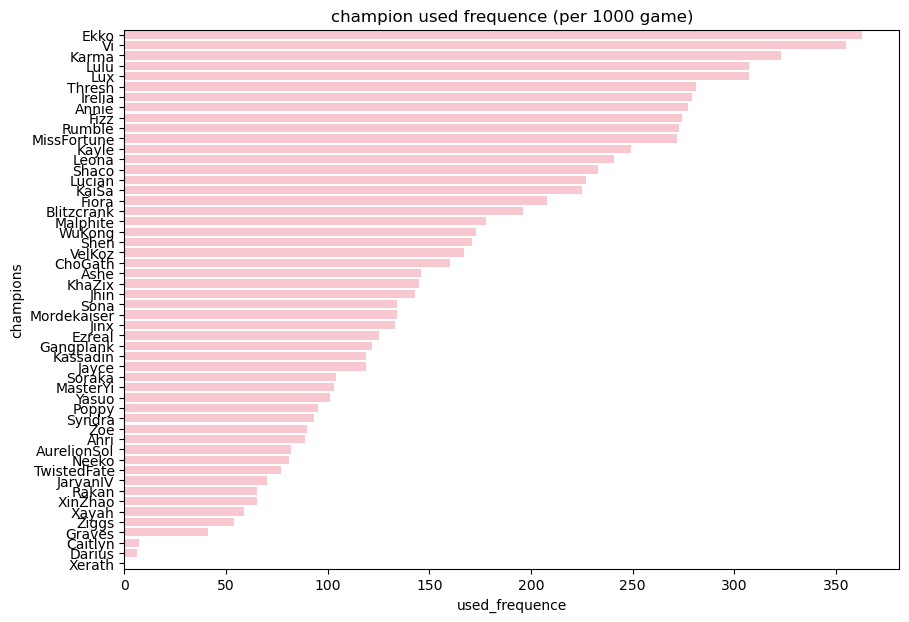

In [6]:
plt.figure(figsize = (10,7))
plotFinal = sns.barplot(data=final_df, x = 'used_frequence', y = 'champions', color='pink').set(title = 'champion used frequence (per 1000 game)')
plt.show()

In [ ]:
#With this barplot, we can see that froom all the champions appears in the dataset(rank Master):
#'Ekko' is the most commonly used,which appears 363 times out of 1000 games.
#'Xerath' is the least commonly used, which appears 0 times out of 1000 games